In [1]:
import pywindow as pw

In [2]:
traj = pw.DLPOLY("./data/input/HISTORY_periodic")

In [3]:
traj.no_of_frames

5

In [4]:
traj.analysis(
    forcefield="opls",
    swap_atoms={"he": "H"},
    ncpus=8,
    rebuild=True,
    modular=True,
)

In [5]:
traj.analysis_output

{0: {0: {'centre_of_mass': array([ 12.17924481,  12.65617432,  12.45387128]),
   'maximum_diameter': {'atom_1': 72,
    'atom_2': 150,
    'diameter': 22.890439302197333},
   'no_of_atoms': 168,
   'pore_diameter': {'atom': 90, 'diameter': 4.9865287865985497},
   'pore_diameter_opt': {'atom_1': 90,
    'centre_of_mass': array([ 12.21623713,  12.4706007 ,  12.5012677 ]),
    'diameter': 5.1843239574594318},
   'pore_volume': 64.922257646796609,
   'pore_volume_opt': 72.958352401534867,
   'windows': {'centre_of_mass': array([[ 10.68058027,  10.81772004,  14.2069407 ],
           [ 13.75183765,  14.29795313,  14.14336657],
           [ 13.85556741,  11.09988317,  10.93864333],
           [ 10.53883019,  13.91636613,  10.72631137]]),
    'diameters': array([ 3.68664094,  3.62958774,  3.61852716,  3.31918341])}},
  1: {'centre_of_mass': array([ 18.4959888 ,   6.30751246,   6.07180989]),
   'maximum_diameter': {'atom_1': 86,
    'atom_2': 133,
    'diameter': 22.639701885658059},
   'no_of_

In [6]:
windows = []
pore_diam_opt = []
max_diam = []

for key in traj.analysis_output:
    for mol in traj.analysis_output[key]:
        for i in traj.analysis_output[key][mol]["windows"]["diameters"]:
            windows.append(i)
        pore_diam_opt.append(
            traj.analysis_output[key][mol]["pore_diameter_opt"]["diameter"]
        )
        max_diam.append(
            traj.analysis_output[key][mol]["maximum_diameter"]["diameter"]
        )

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [10]:
x_range_windows = np.linspace(min(windows) - 1, max(windows) + 1, 1000)

kde_windows = stats.gaussian_kde(windows)
dist_windows = kde_windows(x_range_windows)

x_range_pore = np.linspace(
    min(pore_diam_opt) - 1, max(pore_diam_opt) + 1, 1000
)

kde_pore = stats.gaussian_kde(pore_diam_opt)
dist_pore = kde_pore(x_range_pore)

x_range_max = np.linspace(min(max_diam) - 1, max(max_diam) + 1, 1000)

kde_max = stats.gaussian_kde(max_diam)
dist_max = kde_max(x_range_max)

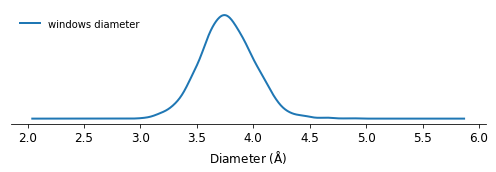

In [11]:
fig, ax = plt.subplots(figsize=(7, 2.5))

plt.plot(x_range_windows, dist_windows, label="windows diameter", linewidth=2)

ax.axes.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_color("k")
ax.spines["left"].set_visible(False)
ax.grid(b=False)
ax.set_facecolor("white")
ax.tick_params(axis="both", which="major", labelsize=12, top="off")
[t.set_color("k") for t in ax.xaxis.get_ticklabels()]
[
    text.set_color("k")
    for text in ax.legend(frameon=False, fontsize=10, loc=2).get_texts()
]
ax.set_xlabel(r"Diameter ($\mathregular{\AA)}$", fontsize=12)

plt.tight_layout()
# plt.savefig("trajectory_windows.pdf", dpi=300)
plt.show()

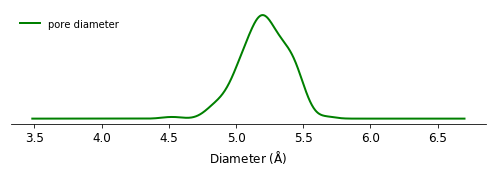

In [12]:
fig, ax = plt.subplots(figsize=(7, 2.5))

plt.plot(
    x_range_pore, dist_pore, label="pore diameter", linewidth=2, color="green"
)

ax.axes.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_color("k")
ax.spines["left"].set_visible(False)
ax.grid(b=False)
ax.tick_params(axis="both", which="major", labelsize=12, top="off")
[t.set_color("k") for t in ax.xaxis.get_ticklabels()]
[
    text.set_color("k")
    for text in ax.legend(frameon=False, fontsize=10, loc=2).get_texts()
]
ax.set_xlabel(r"Diameter ($\mathregular{\AA)}$", fontsize=12)

plt.tight_layout()
# plt.savefig("trajectory_pores.pdf", dpi=300)
plt.show()

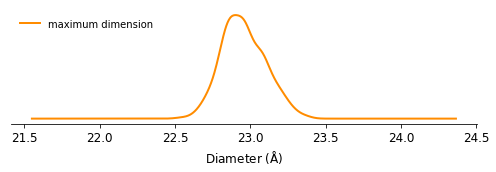

In [13]:
fig, ax = plt.subplots(figsize=(7, 2.5))

plt.plot(
    x_range_max,
    dist_max,
    label="maximum dimension",
    linewidth=2,
    color="darkorange",
)

ax.axes.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_color("k")
ax.spines["left"].set_visible(False)
ax.grid(b=False)
ax.set_facecolor("white")
ax.tick_params(axis="both", which="major", labelsize=12, top="off")
[t.set_color("k") for t in ax.xaxis.get_ticklabels()]
[
    text.set_color("k")
    for text in ax.legend(frameon=False, fontsize=10, loc=2).get_texts()
]
ax.set_xlabel(r"Diameter ($\mathregular{\AA)}$", fontsize=12)

plt.tight_layout()
# plt.savefig("trajectory_maxdim.pdf", dpi=300)
plt.show()